In [47]:
import os
import zipfile
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import keras
import cv2
import csv
import tifffile

%matplotlib inline

from sklearn.cluster import KMeans

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


# Pre-Processing data

In [48]:
input_data = []
label = []
#Adjust the path accordingly after downloading the data
path = "../data/sentinel-2/"
train_paths = path + "train.csv"
IMG_SIZE = 64

with open(train_paths, newline='') as f:
    reader = csv.reader(f)
    data = list(reader)

print(data[:5])

for row in data[1:]:
    # print(row)
    img=tifffile.imread(path+row[0])
    #Selecting important bands
    img = np.dstack([img[:,:,2],img[:,:,3],img[:,:,5]])
    img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))

    input_data.append(img)
    label.append(row[1])

input_data = np.array(input_data)
data_label = np.array([int(x) for x in label])

# Normalization
input_data = input_data/255.0
#Data Falttening
reshaped_data = input_data.reshape(len(input_data),-1)
reshaped_data.shape

[['Filename', 'Label', 'ClassName'], ['PermanentCrop/PermanentCrop_2401.tif', '6', 'PermanentCrop'], ['PermanentCrop/PermanentCrop_1006.tif', '6', 'PermanentCrop'], ['HerbaceousVegetation/HerbaceousVegetation_1025.tif', '2', 'HerbaceousVegetation'], ['SeaLake/SeaLake_1439.tif', '9', 'SeaLake']]


(19317, 12288)

# Applying K-Means Clustering


In [49]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(reshaped_data)
kmeans.cluster_centers_.shape

(10, 12288)

## Scatter Plot

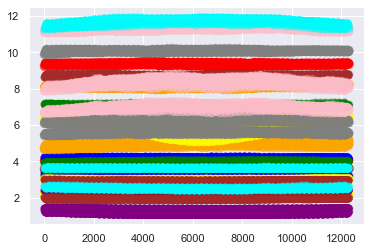

In [50]:
x_data = [i for i in range(12288)]

plt.scatter(x_data,kmeans.cluster_centers_[0], color = 'red',alpha=0.2,s=70)
plt.scatter(x_data,kmeans.cluster_centers_[1] , color = 'blue',alpha=0.2,s=50)
plt.scatter(x_data,kmeans.cluster_centers_[2], color = 'orange',alpha=0.2,s=70)
plt.scatter(x_data,kmeans.cluster_centers_[3] , color = 'green',alpha=0.2,s=50)
plt.scatter(x_data,kmeans.cluster_centers_[4], color = 'yellow',alpha=0.2,s=70)
plt.scatter(x_data,kmeans.cluster_centers_[5] , color = 'purple',alpha=0.2,s=50)
plt.scatter(x_data,kmeans.cluster_centers_[6], color = 'grey',alpha=0.2,s=70)
plt.scatter(x_data,kmeans.cluster_centers_[7] , color = 'brown',alpha=0.2,s=50)
plt.scatter(x_data,kmeans.cluster_centers_[8], color = 'pink',alpha=0.2,s=70)
plt.scatter(x_data,kmeans.cluster_centers_[9] , color = 'cyan',alpha=0.2,s=50)

## Clustering Accuracy

In [51]:
# Since K-Means Does not know about our labels we have to change labels of k-means according to our usage
# mapping labels from cluster to original labels
def get_reference_dict(clusters,data_label):
    reference_label = {}
    # For loop to run through each label of cluster label
    for i in range(len(np.unique(clusters))):
        index = np.where(clusters == i,1,0)
        num = np.bincount(data_label[index==1]).argmax()
        reference_label[i] = num
    return reference_label

# Mapping predictions to original labels
def get_labels(clusters,refernce_labels):
    temp_labels = np.random.rand(len(clusters))
    for i in range(len(clusters)):
        temp_labels[i] = reference_labels[clusters[i]]
    return temp_labels


In [52]:
reference_labels = get_reference_dict(clusters,data_label)
predicted_labels = get_labels(clusters,reference_labels)
# Accuracy Score for right predictions
print(accuracy_score(predicted_labels,data_label))

0.43940570481958896


## Heatmap

Text(0.5, 48.453125, 'predicted label')

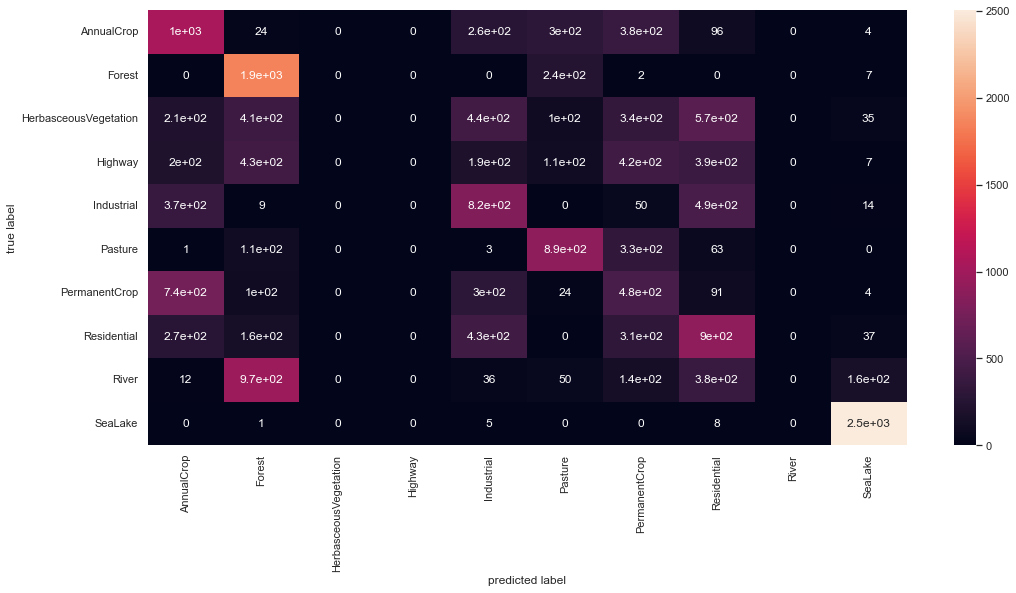

In [53]:
mat = confusion_matrix(data_label,predicted_labels)
x_axis_labels = ['AnnualCrop','Forest','HerbasceousVegetation','Highway','Industrial','Pasture','PermanentCrop','Residential','River','SeaLake'] # labels for x-axis

# create seabvorn heatmap with required labels
sns.set(rc = {'figure.figsize':(17,8)})
sns.heatmap(mat, annot=True , xticklabels=x_axis_labels, yticklabels=x_axis_labels)
plt.ylabel('true label')
plt.xlabel('predicted label')